In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('wage.xlsx', 'wage')

In [3]:
df.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
0,2,0,0,7,29,NaN,NaN,158413,1,0,...,1,548,0,15.0,NaN,1.0,0.0,16,6.306275,256
1,3,0,0,12,27,8.0,8.0,380166,1,0,...,1,481,0,35.0,93.0,1.0,1.0,9,6.175867,81
2,4,0,0,12,34,14.0,12.0,367470,1,0,...,1,721,0,42.0,103.0,1.0,1.0,16,6.580639,256
3,5,1,1,11,27,11.0,12.0,380166,1,0,...,1,250,0,25.0,88.0,1.0,1.0,10,5.521461,100
4,6,1,1,12,34,8.0,7.0,367470,1,0,...,1,729,0,34.0,108.0,1.0,0.0,16,6.591674,256


In [4]:
df.describe()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
count,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,2320.000000,2657.000000,3.010000e+03,3010.000000,3010.000000,...,3010.000000,3010.000000,3010.000000,2963.000000,2061.000000,3003.000000,2997.000000,3010.000000,3010.000000,3010.000000
mean,2581.748837,0.440864,0.682060,13.263455,28.119601,10.003448,10.348137,3.211853e+05,0.789369,0.100664,...,0.649502,577.282392,0.092359,33.540668,102.449782,2.271395,0.674341,8.856146,6.261832,95.579070
std,1500.538849,0.496573,0.465753,2.676913,3.137004,3.720737,3.179671,1.706458e+05,0.407825,0.300934,...,0.477205,262.958302,0.289580,8.611619,15.423756,2.066823,0.468699,4.141672,0.443798,84.618314
min,2.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,7.560700e+04,0.000000,0.000000,...,0.000000,100.000000,0.000000,4.000000,50.000000,1.000000,0.000000,0.000000,4.605170,0.000000
25%,1275.500000,0.000000,0.000000,12.000000,25.000000,8.000000,8.000000,1.227980e+05,1.000000,0.000000,...,0.000000,394.250000,0.000000,28.000000,93.000000,1.000000,0.000000,6.000000,5.976985,36.000000
50%,2541.000000,0.000000,1.000000,13.000000,28.000000,10.000000,12.000000,3.652000e+05,1.000000,0.000000,...,1.000000,537.500000,0.000000,34.000000,103.000000,1.000000,1.000000,8.000000,6.286928,64.000000
75%,3858.750000,1.000000,1.000000,16.000000,31.000000,12.000000,12.000000,4.060240e+05,1.000000,0.000000,...,1.000000,708.750000,0.000000,40.000000,113.000000,4.000000,1.000000,11.000000,6.563503,121.000000
max,5225.000000,1.000000,1.000000,18.000000,34.000000,18.000000,18.000000,1.752340e+06,1.000000,1.000000,...,1.000000,2404.000000,1.000000,56.000000,149.000000,6.000000,1.000000,23.000000,7.784889,529.000000


In [5]:
df_dropped = df.drop(['id'], axis=1)

In [6]:
df_corr = df_dropped.corr()

In [7]:
print(type(df_corr.where(abs(df_corr) > 0.5)))
# motheduc, fatheduc
# weight, black
# educ, IQ
# exper


<class 'pandas.core.frame.DataFrame'>


In [8]:
df_corr_greater_half = df_corr.where(abs(df_corr) > 0.5)

In [9]:
print(df_corr_greater_half)

          nearc2  nearc4      educ       age  fatheduc  motheduc    weight  \
nearc2       1.0     NaN       NaN       NaN       NaN       NaN       NaN   
nearc4       NaN     1.0       NaN       NaN       NaN       NaN       NaN   
educ         NaN     NaN  1.000000       NaN       NaN       NaN       NaN   
age          NaN     NaN       NaN  1.000000       NaN       NaN       NaN   
fatheduc     NaN     NaN       NaN       NaN  1.000000  0.631488       NaN   
motheduc     NaN     NaN       NaN       NaN  0.631488  1.000000       NaN   
weight       NaN     NaN       NaN       NaN       NaN       NaN  1.000000   
momdad14     NaN     NaN       NaN       NaN       NaN       NaN       NaN   
sinmom14     NaN     NaN       NaN       NaN       NaN       NaN       NaN   
step14       NaN     NaN       NaN       NaN       NaN       NaN       NaN   
reg661       NaN     NaN       NaN       NaN       NaN       NaN       NaN   
reg662       NaN     NaN       NaN       NaN       NaN       NaN

In [10]:
df_columns = df_corr_greater_half.columns
df_rows = df_corr_greater_half.index

In [34]:
df_columns

Index(['nearc2', 'nearc4', 'educ', 'age', 'fatheduc', 'motheduc', 'weight',
       'momdad14', 'sinmom14', 'step14', 'reg661', 'reg662', 'reg663',
       'reg664', 'reg665', 'reg666', 'reg667', 'reg668', 'reg669', 'south66',
       'black', 'smsa', 'south', 'smsa66', 'wage', 'enroll', 'KWW', 'IQ',
       'married', 'libcrd14', 'exper', 'lwage', 'expersq'],
      dtype='object')

In [35]:
df_rows

Index(['nearc2', 'nearc4', 'educ', 'age', 'fatheduc', 'motheduc', 'weight',
       'momdad14', 'sinmom14', 'step14', 'reg661', 'reg662', 'reg663',
       'reg664', 'reg665', 'reg666', 'reg667', 'reg668', 'reg669', 'south66',
       'black', 'smsa', 'south', 'smsa66', 'wage', 'enroll', 'KWW', 'IQ',
       'married', 'libcrd14', 'exper', 'lwage', 'expersq'],
      dtype='object')

In [62]:
s = set([])
for i in range(len(df_columns)):
    for j in range(len(df_rows)):
        if pd.notna(df_corr_greater_half.iloc[i,j]):
            if i != j:
                s.add(df_columns[i])
                s.add(df_rows[j])
                print(df_columns[i],df_rows[j], df_corr_greater_half.iloc[i, j])

TypeError: 'set' object is not callable

In [13]:
categorical_labels = ['id', 'nearc2', 'nearc4', 'momdad14', 'sinmom14', 'step14', 'reg661', 'reg662', 'reg663', 'reg664',	
'reg665',	'reg666',	'reg667',	'reg668',	'reg669',	'south66',	'black',	'smsa',	'south',	'smsa66', 'enroll',
'married', 'libcrd14']


In [16]:
df_dropped = df.drop(categorical_labels, axis=1)

In [17]:
df_dropped

,educ,age,fatheduc,motheduc,weight,wage,KWW,IQ,exper,lwage,expersq
0,7,29,NaN,NaN,158413,548,15.0,NaN,16,6.306275,256
1,12,27,8.0,8.0,380166,481,35.0,93.0,9,6.175867,81
2,12,34,14.0,12.0,367470,721,42.0,103.0,16,6.580639,256
3,11,27,11.0,12.0,380166,250,25.0,88.0,10,5.521461,100
4,12,34,8.0,7.0,367470,729,34.0,108.0,16,6.591674,256
...,...,...,...,...,...,...,...,...,...,...,...
3005,12,25,8.0,12.0,82135,335,15.0,NaN,7,5.814130,49
3006,13,34,NaN,NaN,88765,481,43.0,NaN,15,6.175867,225
3007,12,24,11.0,NaN,89271,500,25.0,109.0,6,6.214608,36
3008,12,31,NaN,NaN,110376,713,32.0,107.0,13,6.569481,169


In [19]:
df_corr = df_dropped.corr()

In [23]:
df_corr_half = df_corr.where(abs(df_corr) >= 0.5)

In [25]:
df_corr_cols = df_corr_half.columns
df_corr_rows = df_corr_half.index

In [26]:
s = set([])
for i in range(len(df_corr_cols)):
    for j in range(len(df_corr_rows)):
        if pd.notna(df_corr_half.iloc[i,j]):
            if i != j:
                s.add(df_corr_cols[i])
                s.add(df_corr_rows[j])
                print(df_corr_cols[i],df_corr_rows[j], df_corr_half.iloc[i, j])

educ IQ 0.5102852064587736
educ exper -0.6529562695276311
educ expersq -0.6315212963089037
age exper 0.7630735511159035
age expersq 0.7380633970504893
fatheduc motheduc 0.6314882711637659
motheduc fatheduc 0.6314882711637659
wage lwage 0.9472459957298922
IQ educ 0.5102852064587736
exper educ -0.6529562695276311
exper age 0.7630735511159035
exper expersq 0.967202493386272
lwage wage 0.9472459957298922
expersq educ -0.6315212963089037
expersq age 0.7380633970504893
expersq exper 0.967202493386272


In [32]:
sum(df.isna().unstack())

2059

In [35]:
df_IQ = df[['IQ', 'wage']].dropna()

In [36]:
df_IQ.corr()

,IQ,wage
IQ,1.000000,0.192012
wage,0.192012,1.000000


In [37]:
df[['IQ', 'wage']].corr()

,IQ,wage
IQ,1.000000,0.192012
wage,0.192012,1.000000


In [38]:
import seaborn as sns

/Users/jaydentran1909/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IQ', ylabel='wage'>

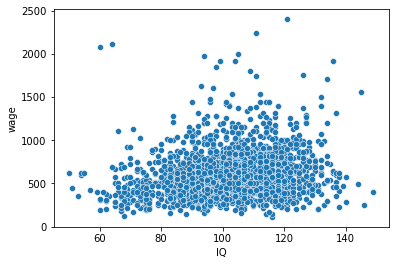

In [39]:
sns.scatterplot(df_IQ['IQ'], df['wage'], )